In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
np.cov(iris.data[:,2], iris.data[:,1])

array([[ 3.11627785, -0.32965638],
       [-0.32965638,  0.18997942]])

In [5]:
# 상관계수: -1 ~ 1
# 공분산 / (A변수 표준편차 * B변수 표준편차)
np.corrcoef(iris.data[:,0], iris.data[:,2])

array([[1.        , 0.87175378],
       [0.87175378, 1.        ]])

In [6]:
X = iris.data[:, [2,3]]
y = iris.target
X.shape

(150, 2)

## 교차검증

In [ ]:
parma_tree = {'criterion':['gini','entropy'],
              'max_depth':np.arange(3,12)}

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [31]:
iris_data =load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증세트는3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv =3)
print(np.round(scores, 4)) # 검증별 정확도
np.round(np.mean(scores),4) # 평균 검증 정확도

[0.98 0.94 0.98]


0.9667

## 학습데이터 분리
## tree모델 : depth= 3, entropy방식

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
print(len(X_train),len(X_test))

105 45


In [9]:
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [10]:
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [11]:
y_pred = model.predict(X_test)

In [12]:
print('예측값:',y_pred)
print('실제값:',y_test)


예측값: [2 1 1 0 0 2 1 2 0 1 1 2 0 1 1 1 2 1 2 0 2 1 1 2 0 1 1 2 0 0 0 1 2 0 2 1 0
 1 2 2 0 1 2 2 1]
실제값: [2 1 1 0 0 2 2 2 0 1 1 2 0 1 1 1 2 1 2 0 2 1 1 2 0 1 1 2 0 0 0 1 2 0 2 1 0
 1 2 2 0 2 2 1 1]


In [13]:
print(accuracy_score(y_pred,y_test))

0.9333333333333333


In [14]:
(y_test != y_pred).sum()

3

In [15]:
# row, col 기준빈도수를 세어 도수
con_mat = pd.crosstab(y_test, y_pred, rownames=['pred'], colnames=['test'])

In [16]:
con_mat

test,0,1,2
pred,,,
0,12,0,0
1,0,16,1
2,0,2,14


In [17]:
model.score(X_test,y_test)
model.score(X_train,y_train)


0.9904761904761905

### 임의의 5개 데이터 쌍을 넣어서 예측

In [18]:
X_test2 = [[3.4,2.3],[4.2,5],[2.7,6],[3.4,2.8],[1.2,7]]

In [19]:
y_pred2 = model.predict(X_test2)
y_pred2

array([2, 2, 2, 2, 2])

In [20]:
model.predict_proba(X_test2)


array([[0.        , 0.33333333, 0.66666667],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.33333333, 0.66666667]])

In [21]:
# 이름 출력 : 'setosa', 'versicolor', 'virginica'
for i in y_pred2:
  print(i, iris['target_names'][i])

2 virginica
2 virginica
2 virginica
2 virginica
2 virginica


In [22]:
from matplotlib.colors import ListedColormap

In [23]:
def plot_decision_region(X, y, classifier, test_idx = None,
                         resolution=0.02, title=''):
  markers = ('s','x','o','^','v')
  colors = ('r','b','lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
  x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

  # xx, yy를 평탄화 작업(1차원)으로 처리한후
  # 전치 행렬로 변환
  Z = classifier.predict(np.array([xx.ravel(),yy.ravel()]).T)
  Z = Z.reshape(xx.shape)
  
  plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  X_test = X[test_idx, :]
  for idx, cl in enumerate(np.unique(y)):
    # plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
    #             c=cmap(idx), marker=markers[idx],
    #             label=cl)
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),
            marker=markers[idx], label=cl)
  if test_idx:
    X_test = X[test_idx,:]
    plt.scatter(X_test[:, 0], X_test[:, 1], c=[],linewidth=1,marker='o',label='TestData')
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  plt.legend(loc=2)
  plt.title=title
  plt.show()



In [24]:
x_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

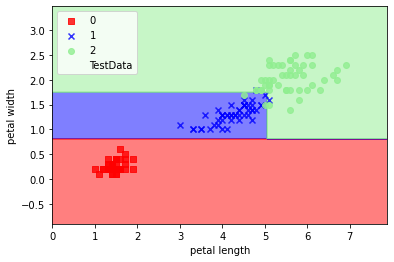

In [25]:
plot_decision_region(X=x_combined_std, y=y_combined,
                    classifier=model,
                    test_idx=range(105, 150),
                    title='Decision Tree')

In [26]:
from io import StringIO
import pydotplus

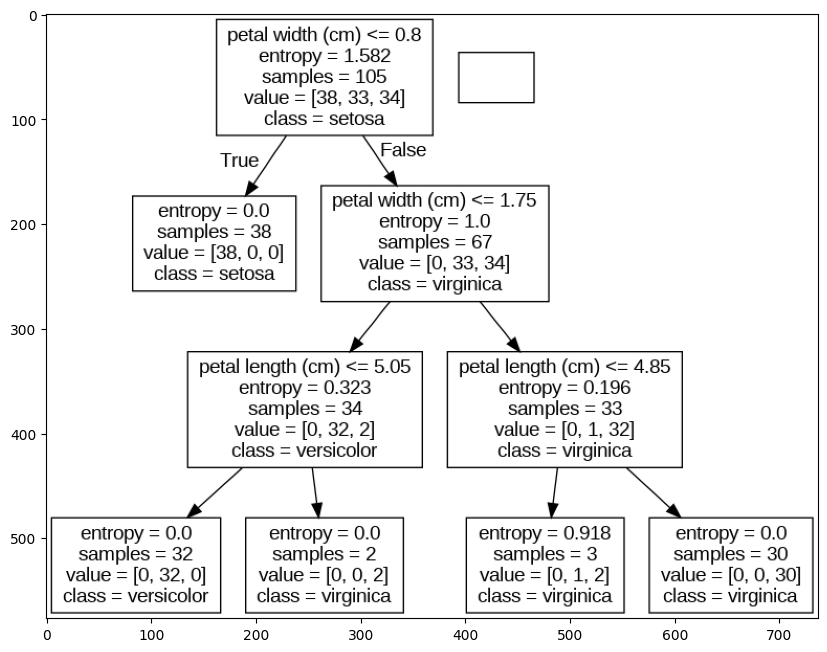

In [27]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,
                     feature_names=iris.feature_names[2:4],
                     class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree2.png')
img = plt.imread('tree2.png')
plt.rcParams.update({'figure.dpi':'100',
                     'figure.figsize':[12,8]})
plt.imshow(img)
plt.show()